In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv("datasets//dengue.csv")

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>1.) what is yearly Mortality rates</h1>

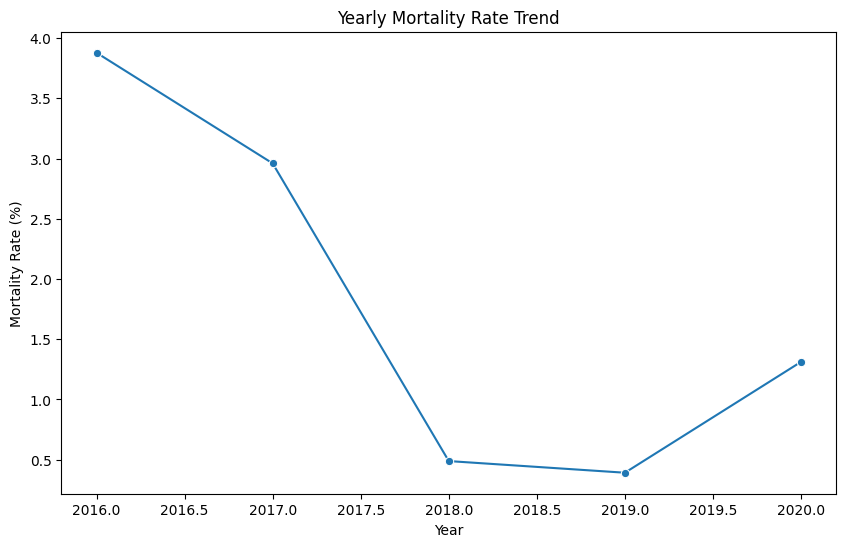

In [8]:
yearly_mortality_rate = dengue.groupby('Year').agg({
    'Dengue_Cases': 'sum',
    'Dengue_Deaths': 'sum'
}).reset_index()

yearly_mortality_rate['Mortality_Rate'] = yearly_mortality_rate['Dengue_Deaths'] / yearly_mortality_rate['Dengue_Cases'] * 100

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_mortality_rate, x='Year', y='Mortality_Rate', marker='o')
plt.title('Yearly Mortality Rate Trend')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.show()


<h1>2.) Impact of Region on Mortality Rate</h1>

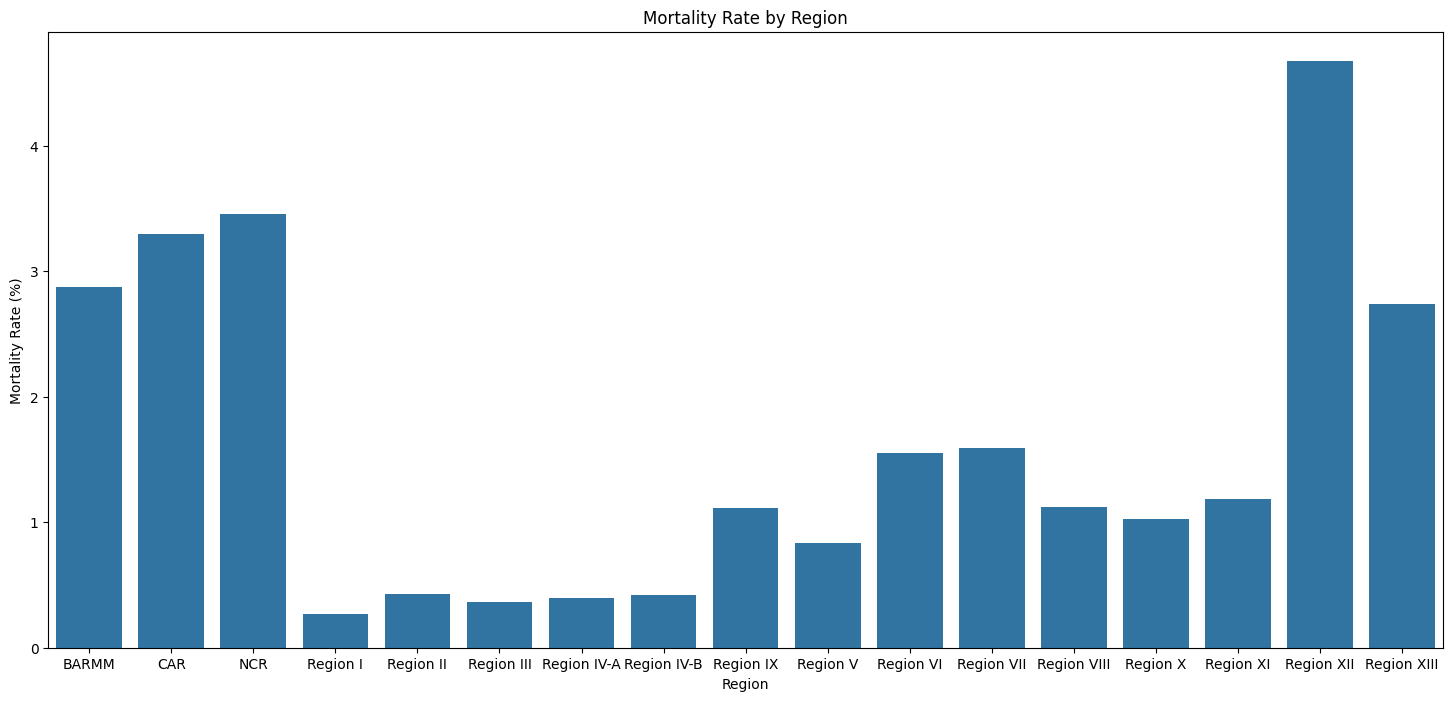

In [11]:
region_mortality_rate = dengue.groupby('Region').agg({
    'Dengue_Cases': 'sum',
    'Dengue_Deaths': 'sum'
}).reset_index()

region_mortality_rate['Mortality_Rate'] = region_mortality_rate['Dengue_Deaths'] / region_mortality_rate['Dengue_Cases'] * 100

plt.figure(figsize=(18, 8))
sns.barplot(data=region_mortality_rate, x='Region', y='Mortality_Rate')
plt.title('Mortality Rate by Region')
plt.xlabel('Region')
plt.ylabel('Mortality Rate (%)')
plt.show()

<h1>3.) Monthly Trend of Dengue Cases and Deaths</h1>

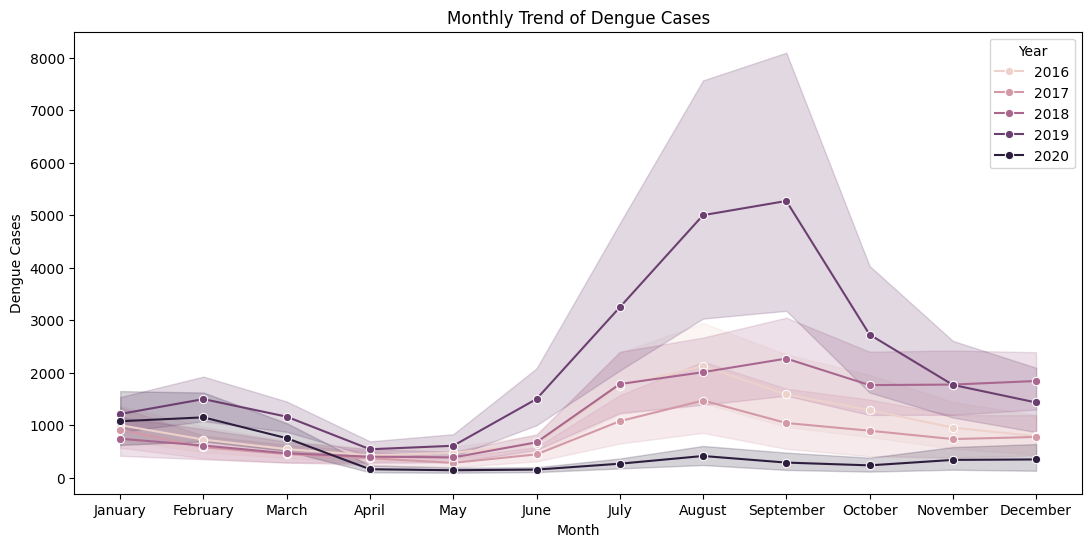

In [14]:
plt.figure(figsize=(13, 6))
sns.lineplot(data=dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.title('Monthly Trend of Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.show()

<h1>4.)Dengue Cases by Year </h1>

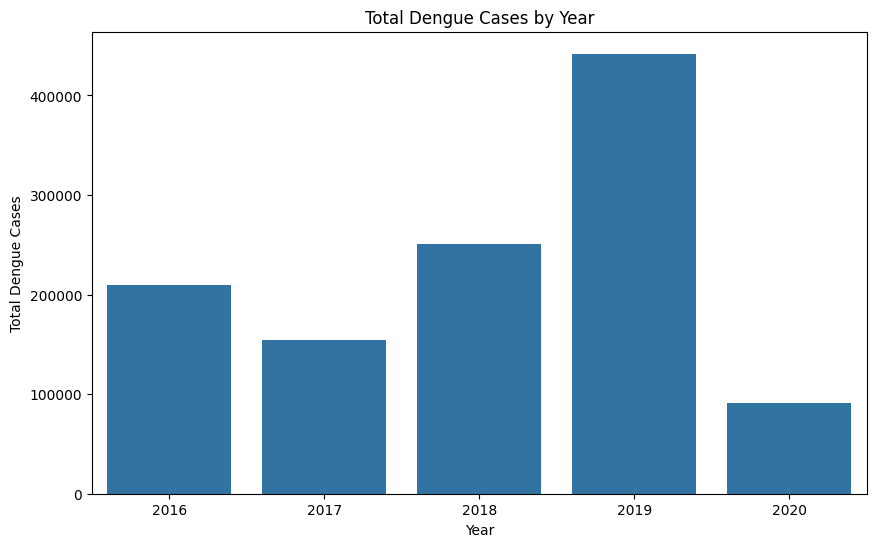

In [15]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_cases, x='Year', y='Dengue_Cases')
plt.title('Total Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.show()


<h1>5.)Dengue Deaths by Year</h1>

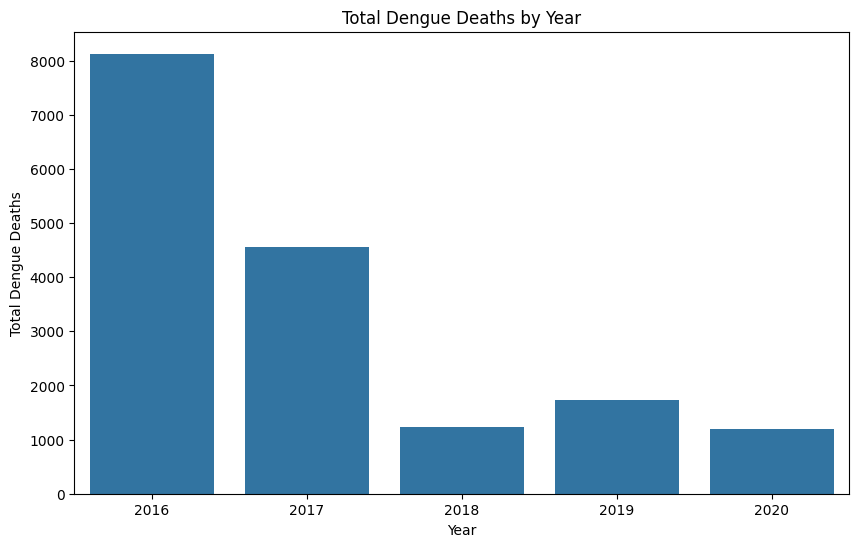

In [17]:
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_deaths, x='Year', y='Dengue_Deaths')
plt.title('Total Dengue Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Deaths')
plt.show()


<h1>6.)Regional Comparison of Dengue Cases</h1>

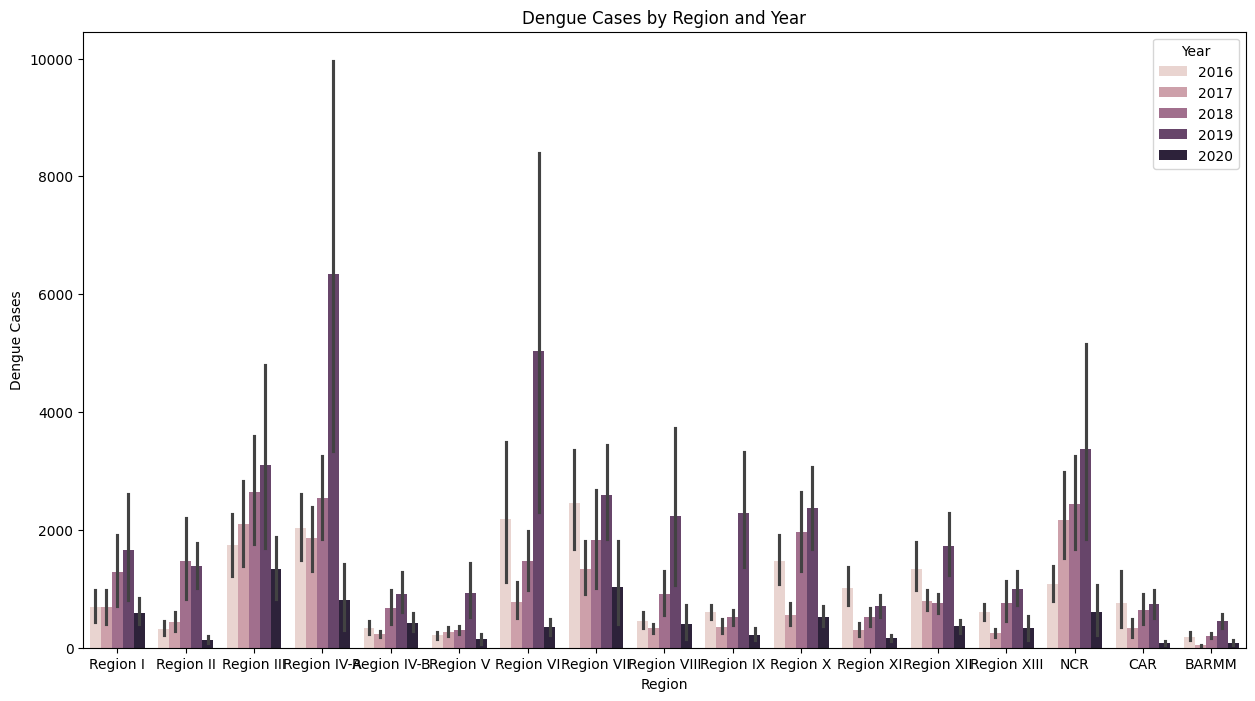

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(data=dengue, x='Region', y='Dengue_Cases', hue='Year')
plt.title('Dengue Cases by Region and Year')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.show()


<h1>7.)Heatmap of Dengue Cases by Month and Region</h1>

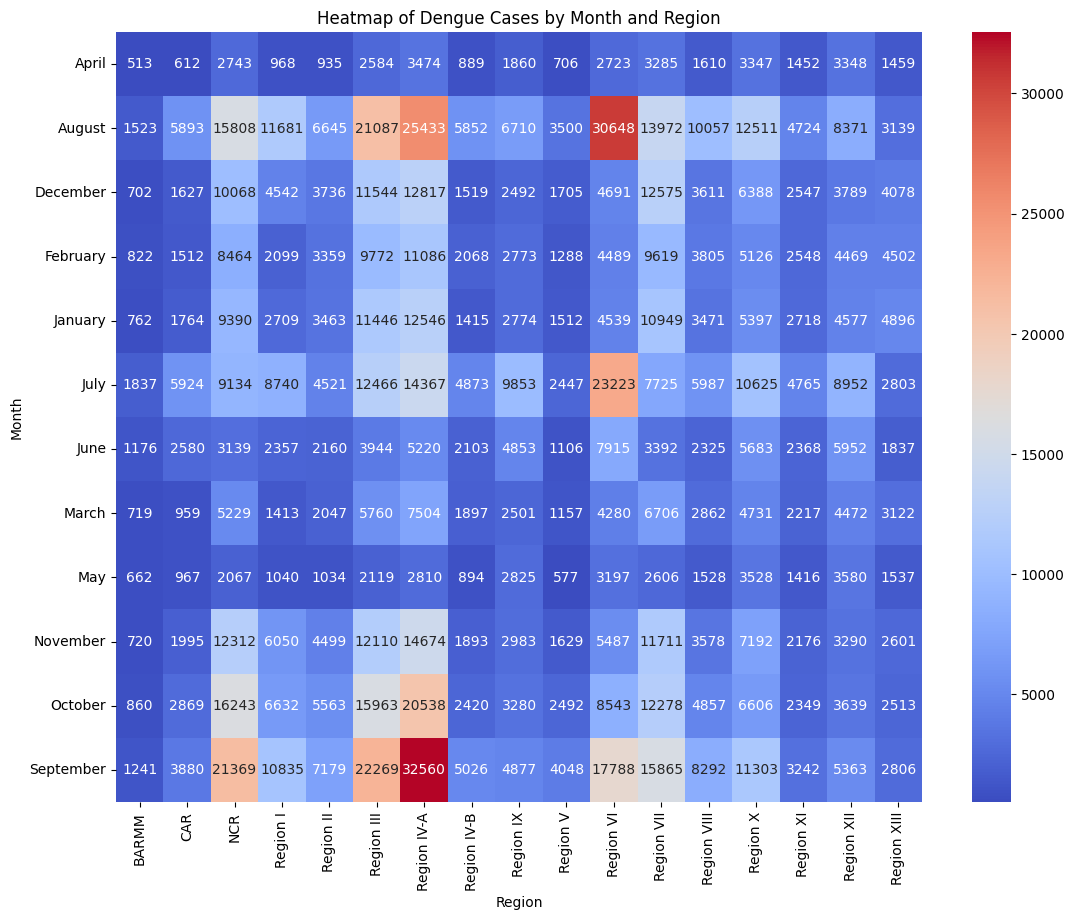

In [23]:
pivot_cases = dengue.pivot_table(values='Dengue_Cases', index='Month', columns='Region', aggfunc='sum')

plt.figure(figsize=(13, 10))
sns.heatmap(pivot_cases, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Dengue Cases by Month and Region')
plt.xlabel('Region')
plt.ylabel('Month')
plt.show()


<h1>8.) Heatmap of Dengue Deaths by Month and Region</h1>

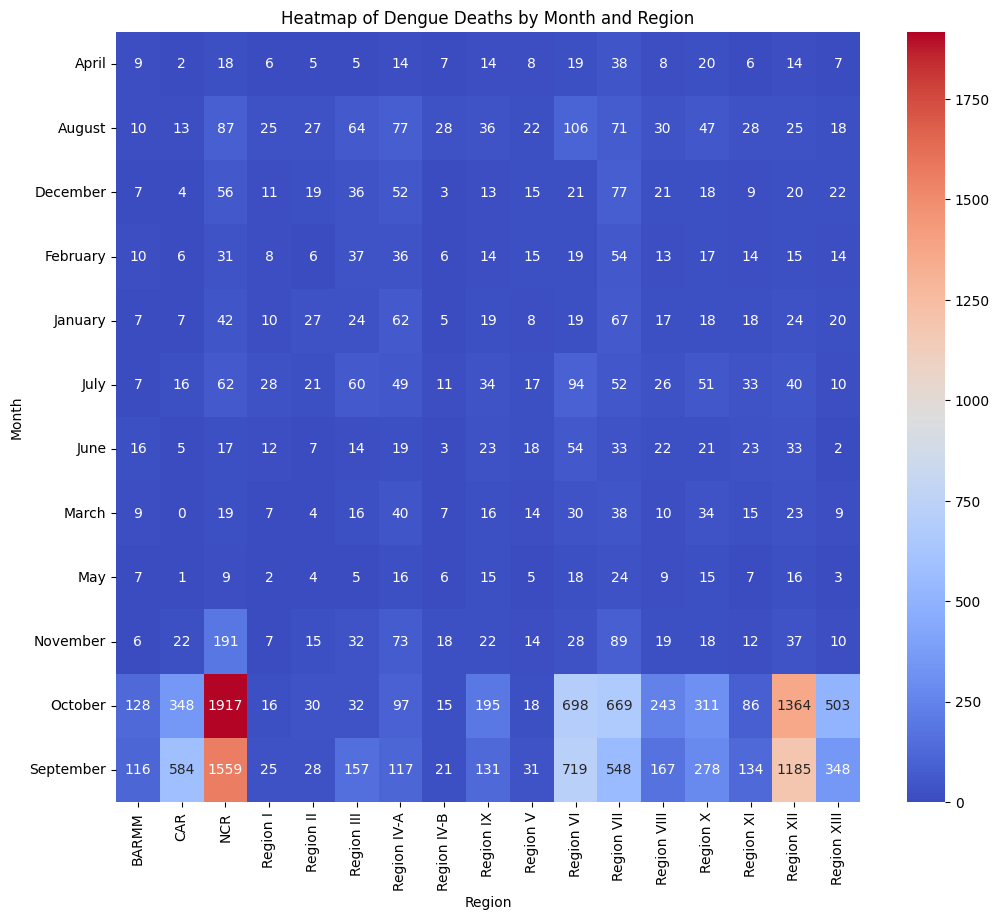

In [24]:
pivot_deaths = dengue.pivot_table(values='Dengue_Deaths', index='Month', columns='Region', aggfunc='sum')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_deaths, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Dengue Deaths by Month and Region')
plt.xlabel('Region')
plt.ylabel('Month')
plt.show()


<h1>9.)What is correlation of Dengue Cases and Deaths</h1>

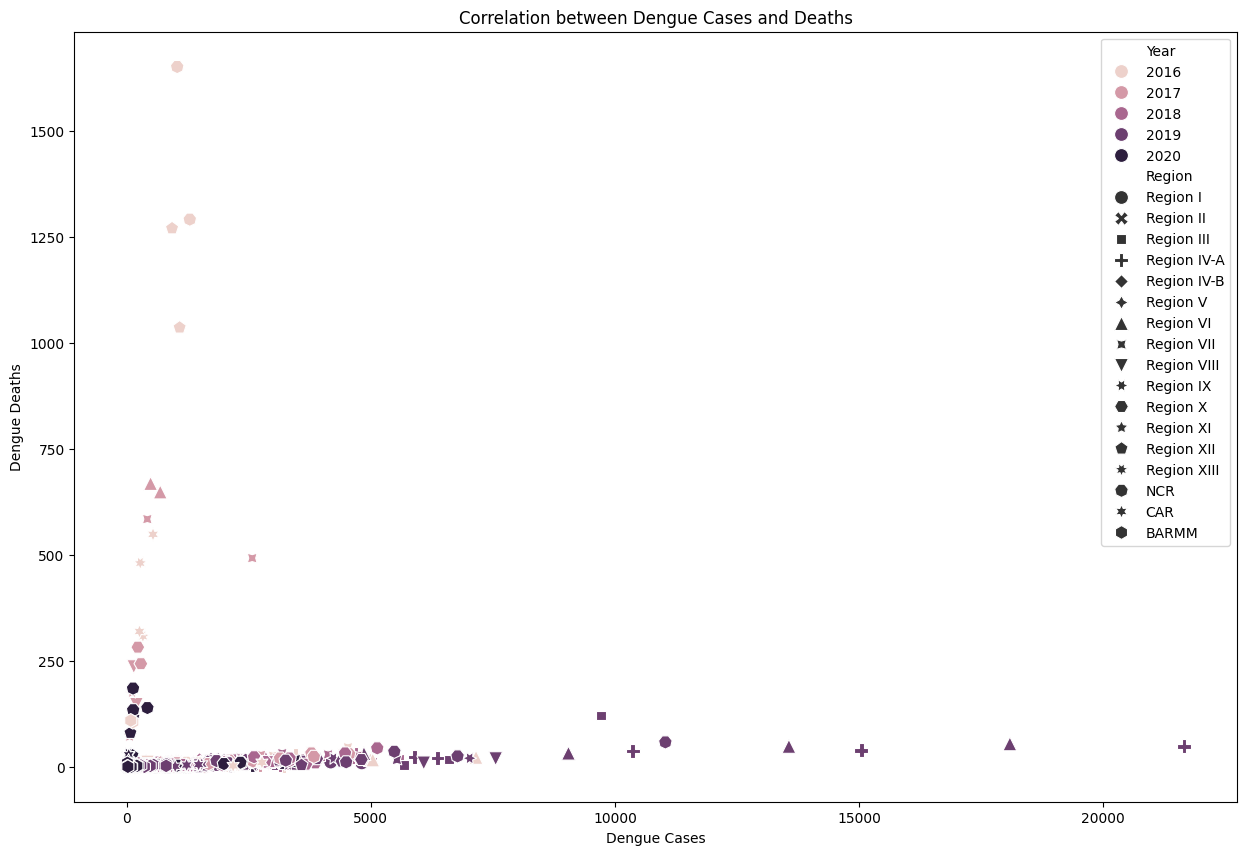

In [28]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Year', style='Region', s=100)
plt.title('Correlation between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()


<h1>10.)what are regions with the Highest Dengue Cases</h1>

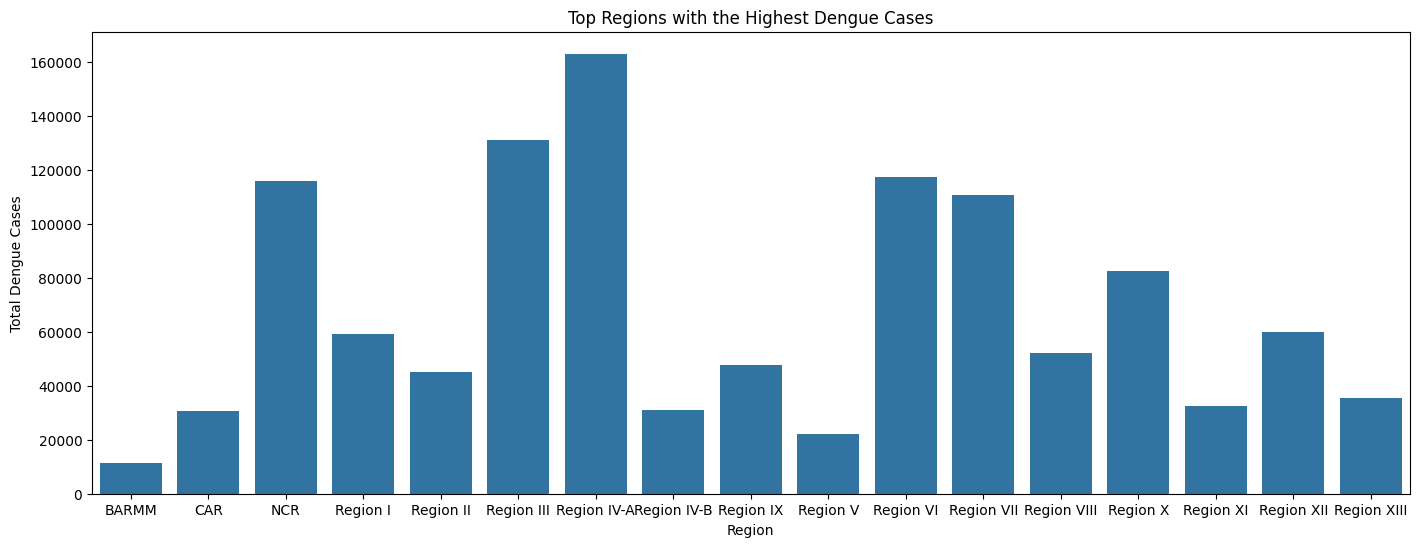

In [31]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.barplot(data=region_cases, x='Region', y='Dengue_Cases')
plt.title('Top Regions with the Highest Dengue Cases')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.show()


<h1>11.)which regions have the most Dengue deaths</h1>

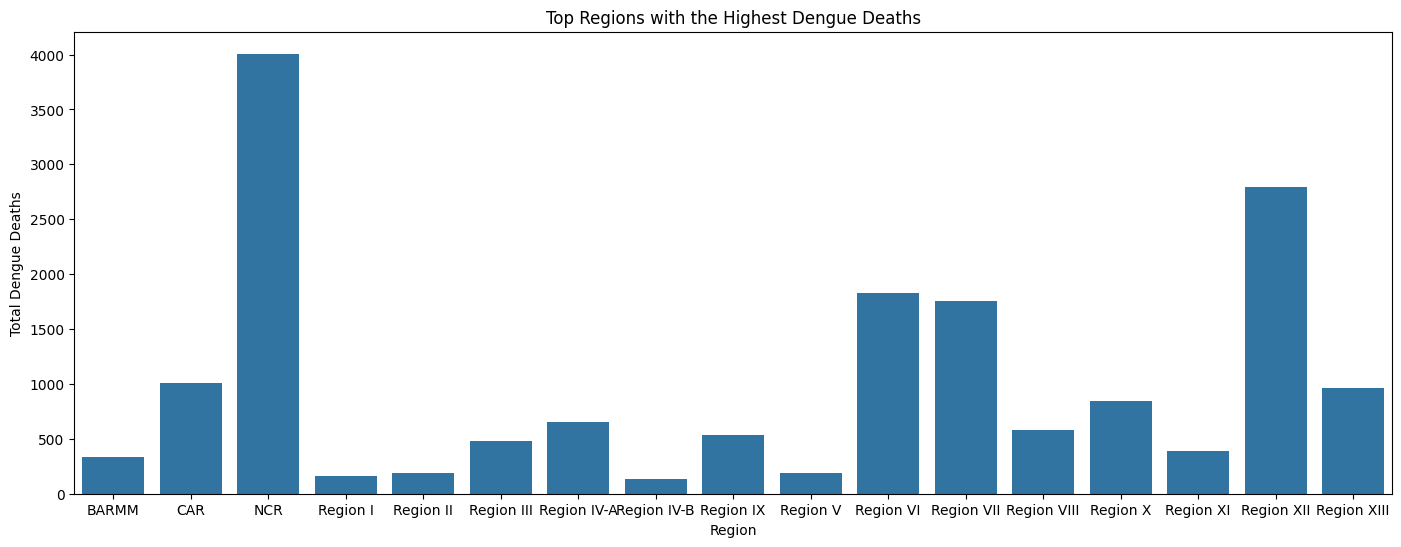

In [33]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(17, 6))
sns.barplot(data=region_deaths, x='Region', y='Dengue_Deaths')
plt.title('Top Regions with the Highest Dengue Deaths')
plt.xlabel('Region')
plt.ylabel('Total Dengue Deaths')
plt.show()


<h1>12.)what are seasonal variations in Dengue cases over months across all years</h1>

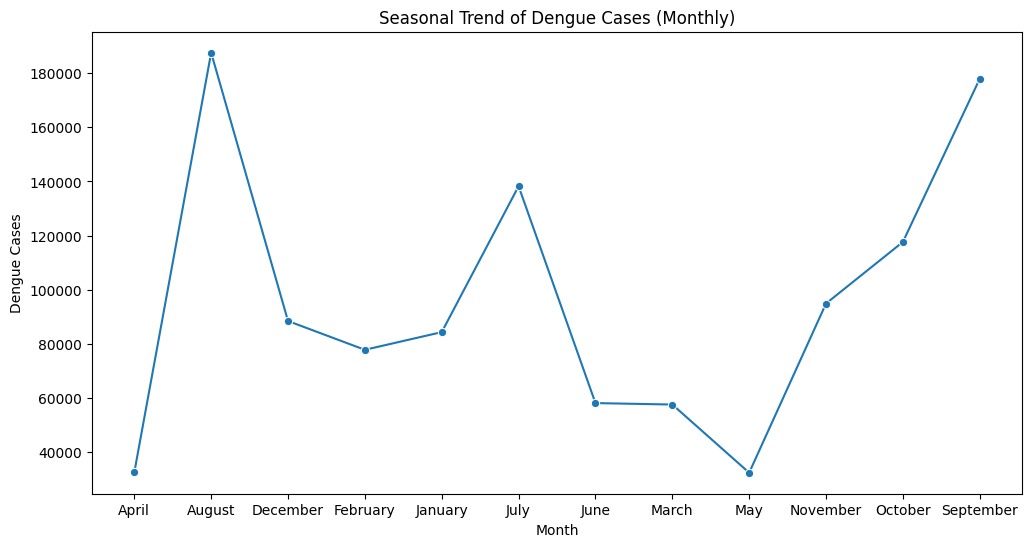

In [35]:
monthly_cases = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cases, x='Month', y='Dengue_Cases', marker='o')
plt.title('Seasonal Trend of Dengue Cases (Monthly)')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.show()


<h1>13.) now lets see what are seasonal variations in Dengue deaths over months</h1>

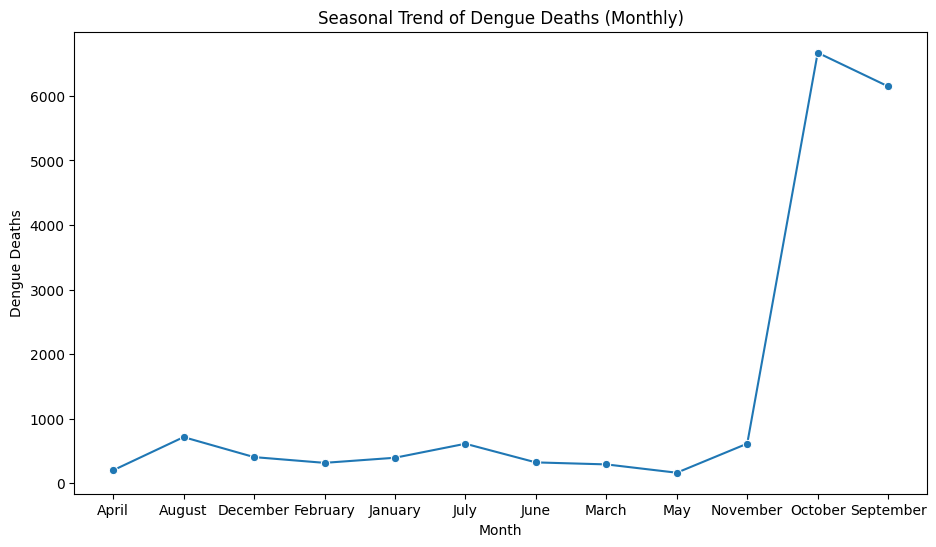

In [37]:
monthly_deaths = dengue.groupby('Month')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(11, 6))
sns.lineplot(data=monthly_deaths, x='Month', y='Dengue_Deaths', marker='o')
plt.title('Seasonal Trend of Dengue Deaths (Monthly)')
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.show()


<h1>14.) compare the change in Dengue cases between consecutive years.</h1>

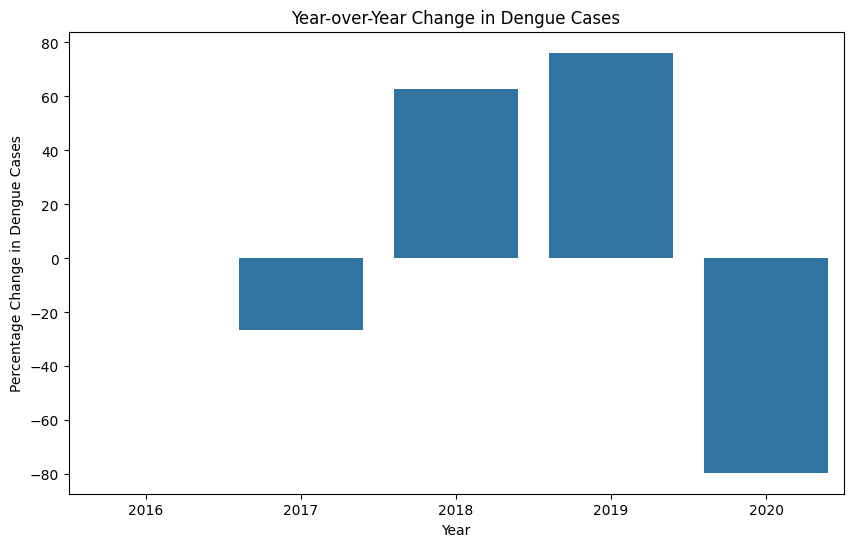

In [38]:
yearly_cases['Change'] = yearly_cases['Dengue_Cases'].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_cases, x='Year', y='Change')
plt.title('Year-over-Year Change in Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Dengue Cases')
plt.show()


<h1>15.) compare the change in Dengue deaths between consecutive years</h1>

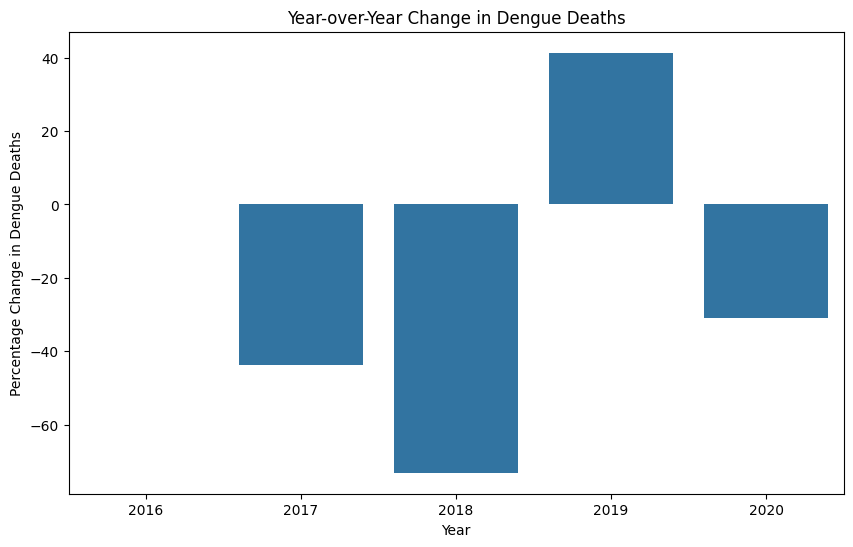

In [39]:
yearly_deaths['Change'] = yearly_deaths['Dengue_Deaths'].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_deaths, x='Year', y='Change')
plt.title('Year-over-Year Change in Dengue Deaths')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Dengue Deaths')
plt.show()


<h1>16.) Check the distribution of Dengue cases</h1>

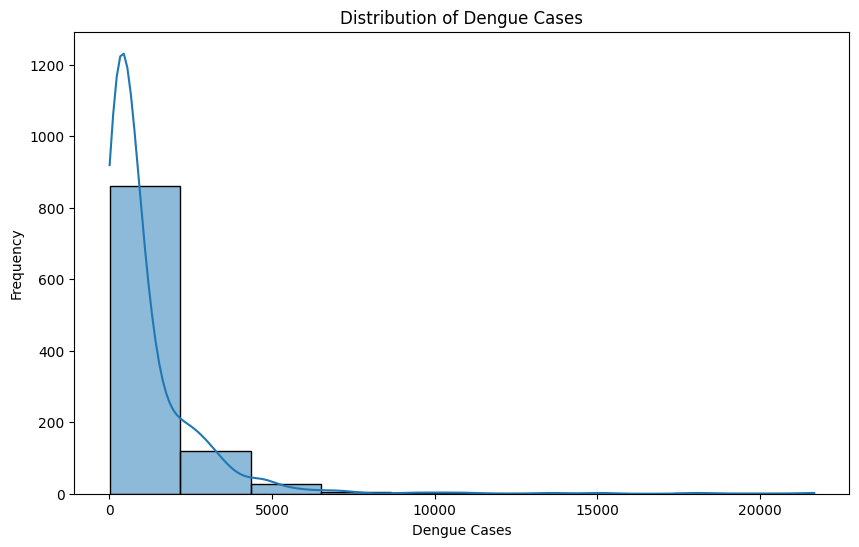

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(dengue['Dengue_Cases'], kde=True, bins=10)
plt.title('Distribution of Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.show()


<h1>17.) Compare the total cases and deaths per region</h1>

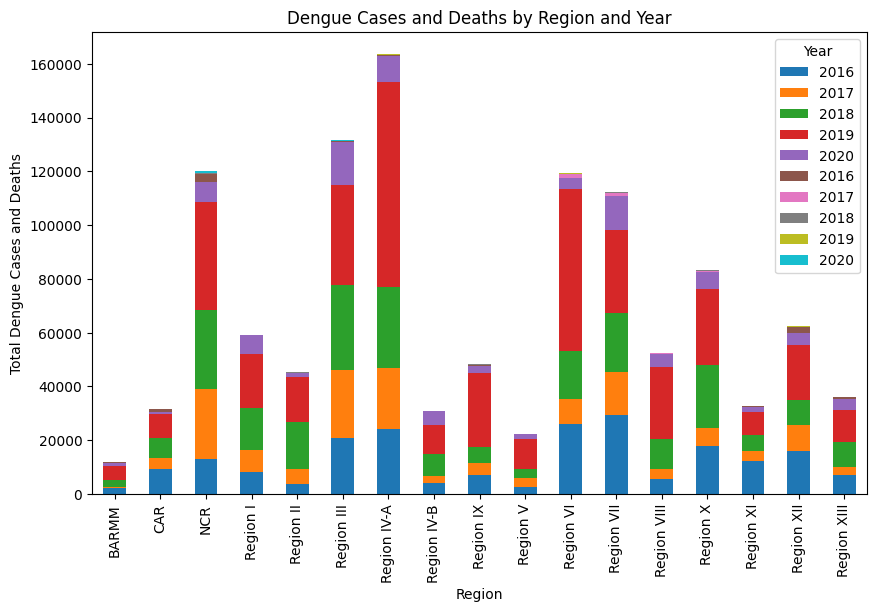

In [41]:
region_yearly = dengue.groupby(['Region', 'Year']).agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).unstack()

region_yearly.columns = region_yearly.columns.droplevel()

region_yearly.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Dengue Cases and Deaths by Region and Year')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases and Deaths')
plt.show()


<h1>18.)correlatioin of number of dengue cases and the number of deaths across regions.</h1>

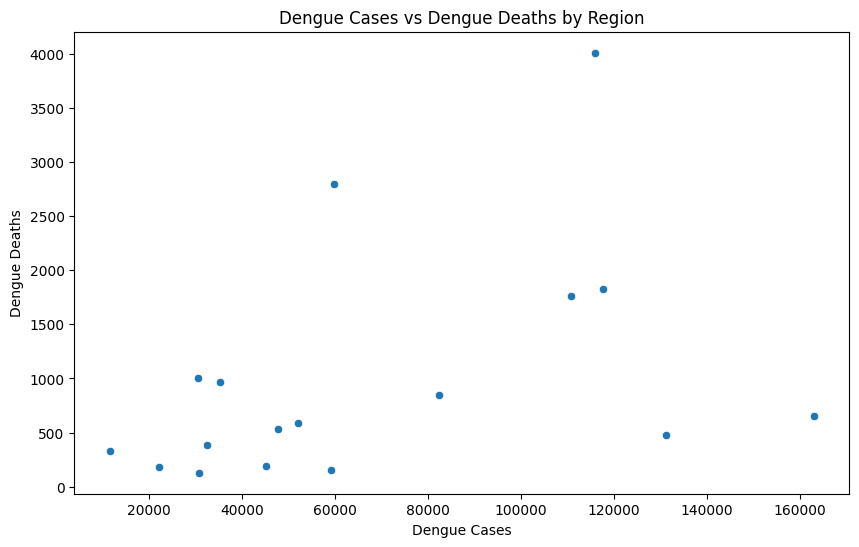

In [45]:
region_dengue = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Dengue_Cases', y='Dengue_Deaths', data=region_dengue)
plt.title('Dengue Cases vs Dengue Deaths by Region')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()


<h1>20.)dengue cases by region (Pie Chart)</h1>

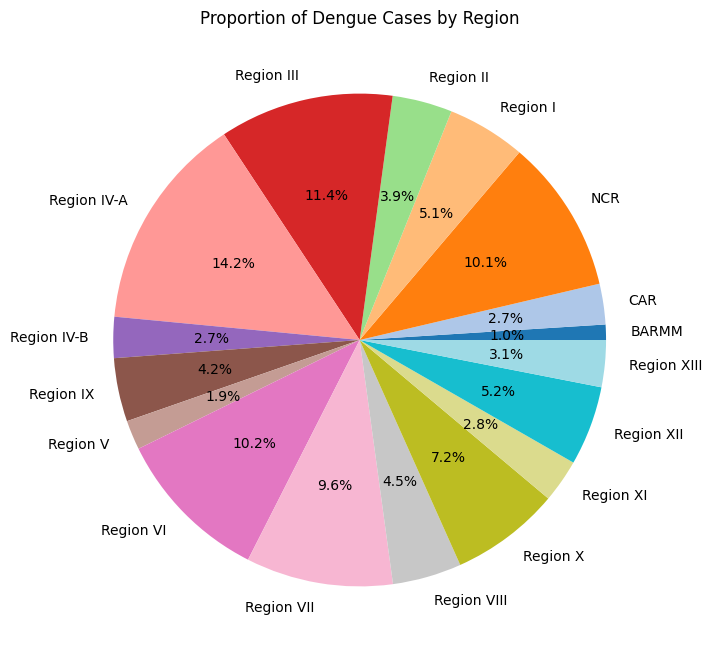

In [46]:
region_dengue = dengue.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(8,8))
region_dengue.plot(kind='pie', autopct='%1.1f%%', cmap='tab20', legend=False)
plt.title('Proportion of Dengue Cases by Region')
plt.ylabel('')
plt.show()
